In [1]:
import os
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tidalUtl.InterfaceSQL as isq
import tidalUtl.PrpUtl as prp
import tidalUtl.EdaUtl as eda
import tidalUtl.VslUtl as vsl

In [2]:
# config
#INPUT = "/home/tidal/ML_Data/MoA/lish-moa"
#OUTPUT = "/home/tidal/ML_Data/MoA/output"
INPUT = "/Users/hfuis/ML_Data/MoA/lish-moa"
OUTPUT = "/Users/hfuis/ML_Data/MoA/output"

In [3]:
trainFeature = pd.read_csv(INPUT + '/train_features.csv')
testFeature = pd.read_csv(INPUT + '/test_features.csv')
trainTargetScored = pd.read_csv(INPUT + '/train_targets_scored.csv')

In [4]:
trainFeature

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
5,id_001762a82,trt_cp,24,D1,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,...,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
6,id_001bd861f,trt_cp,24,D2,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,trt_cp,48,D1,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
8,id_00224bf20,trt_cp,48,D1,-0.3014,0.5545,-0.2576,-0.1390,-0.6487,-0.6057,...,-1.6470,0.2863,1.1070,-0.7735,-1.0280,-1.3070,-0.1167,-0.1241,-0.6420,0.5543
9,id_0023f063e,trt_cp,48,D2,-0.0630,0.2564,-0.5279,-0.2541,-0.0182,-1.5370,...,0.2201,0.5601,-0.3501,-1.4070,-0.1717,-1.1160,-0.8745,-0.2716,0.0189,-2.0000


In [5]:
testFeature

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380
5,id_0042c1364,ctl_vehicle,24,D1,-0.1561,-0.2362,-0.3048,1.5980,-0.7165,0.2701,...,-0.4160,0.4199,0.0587,0.6118,0.1123,0.6559,-0.0676,0.8351,0.9947,0.2858
6,id_006fc47b8,trt_cp,48,D2,0.3658,0.5536,-0.6898,-1.6270,0.5239,-0.3832,...,-0.8820,-0.5378,0.2314,-0.7602,-0.9982,-0.6570,-0.2593,-0.2174,0.0044,-1.4650
7,id_0071d65a2,trt_cp,72,D2,0.0934,0.5554,1.1110,0.5040,-0.7849,-0.8306,...,-0.3544,-0.2964,0.8649,-0.9545,0.8350,0.9412,0.3281,0.4195,0.9772,0.4701
8,id_007a2159c,trt_cp,48,D2,2.3550,-0.6810,0.4372,-0.1076,-0.4687,0.0990,...,-0.0211,-0.2718,0.7157,0.7483,0.7959,0.6287,0.4062,-1.0760,0.5732,-0.0246
9,id_009201382,trt_cp,24,D2,-0.1088,-0.0244,0.8999,-0.1653,1.0310,0.5514,...,-1.2350,0.3024,0.4529,-0.1629,-0.2248,-0.3594,-0.3857,0.9450,0.3904,1.4090


In [6]:
trainTargetScored

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,id_001762a82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,id_001bd861f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,id_0020d0484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,id_00224bf20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,id_0023f063e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
eda.chkDfIsNull(trainFeature)

df is not NULL.


In [9]:
eda.chkDfIsNull(testFeature)

df is not NULL.


In [10]:
eda.chkDfIsNull(trainTargetScored)

df is not NULL.


In [13]:
df = trainFeature
clmnNm = "sig_id"
eda.chkUnique(df, clmnNm)

sig_id is unique.


In [15]:
df = testFeature
clmnNm = "sig_id"
eda.chkUnique(df, clmnNm)

sig_id is unique.


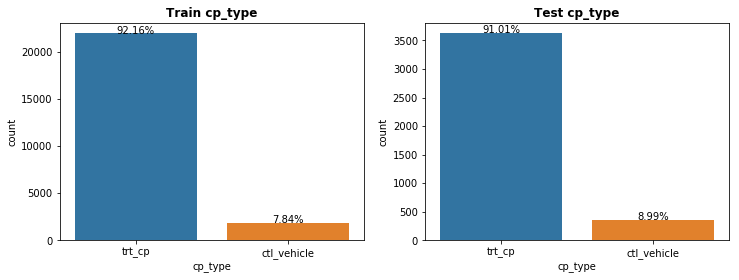

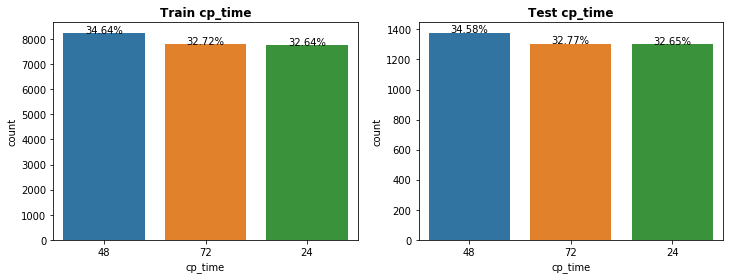

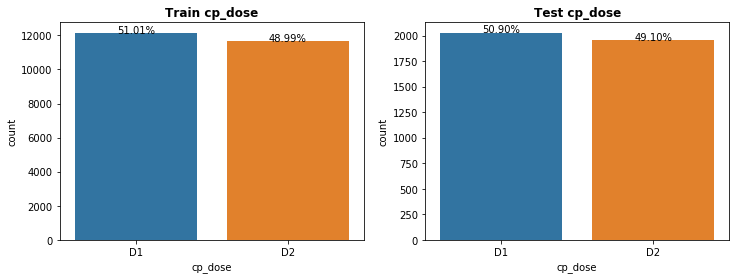

In [9]:
dfTrain = trainFeature
dfTest = testFeature

vsl.histColumn(dfTrain, dfTest, "cp_type")
vsl.histColumn(dfTrain, dfTest, "cp_time")
vsl.histColumn(dfTrain, dfTest, "cp_dose")